In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from mpl_toolkits.mplot3d import axes3d

In [23]:
def CreateSphere( N, R ):
    
    X = np.zeros(N)
    Y = np.zeros_like(X)
    Z = np.zeros_like(X)
    
    
    for i in tqdm(range(N)):
        
        u = np.random.rand()
        r = R*u**(1/3)
        
        theta = np.random.uniform(0,2*np.pi)
        cos_phi = np.random.uniform(-1,1)
        phi=np.arccos(cos_phi)
        
        X[i] = r*np.sin(phi)*np.cos(theta)
        Y[i] = r*np.sin(phi)*np.sin(theta)
        Z[i] = r*cos_phi
    
    return X,Y,Z

In [24]:
N=int(1e4)
X,Y,Z = CreateSphere(N,1)


100%|████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 118323.06it/s]


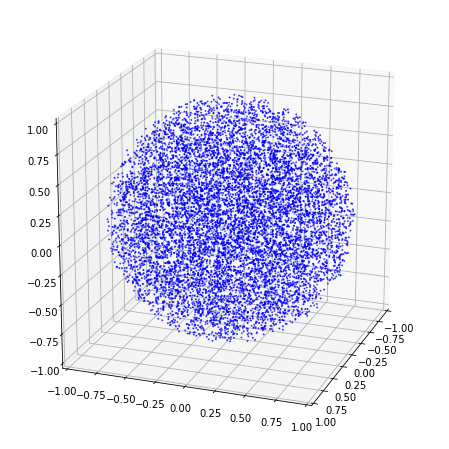

In [25]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection = '3d')

#configurar límites de los ejes
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

ax.view_init(20, 20)
ax.set_box_aspect([1,1,1])

ax.scatter(X,Y,Z,s=1,color='b')

In [26]:
def GetPoints(R):
    u = np.random.rand()
    r = R*u**(1/3)
        
    theta = np.random.uniform(0,2*np.pi)
    cos_phi = np.random.uniform(-1,1)
    phi=np.arccos(cos_phi)
    
    X = r*np.sin(phi)*np.cos(theta)
    Y = r*np.sin(phi)*np.sin(theta)
    Z = r*cos_phi
    return X,Y,Z

In [27]:
N = int(1e5)
Sample = np.zeros(N)

for i in tqdm (range(N)):
    X,Y,Z= GetPoints(1)
    Sample[i] =np.exp(np.sqrt(X**2 + Y**2 + Z**2))

100%|██████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 105331.67it/s]


In [31]:
Integral = (np.average(Sample))*4/3*np.pi
Integral_real=4*np.pi*(np.exp(1)-2)

In [32]:
Integral,Integral_real

(9.021602706912395, 9.02619566197592)

In [33]:
diff=np.abs(Integral-Integral_real)
error=diff/Integral_real*100

In [34]:
print('Error absoluto:',round(diff,4),'\nError porcentual:',round(error,2),'%')

Error absoluto: 0.0046 
Error porcentual: 0.05 %
